# Data Engineer Programming Assignment
We've provided a source file, btc.csv, which contains several years of Bitcoin pricing data.
Please provide a solution which filters and summarises this data. The original pricing is in USD but
as a European organisation we'd like to view summaries in Euros.
There are three outputs expected
##### 1. A new file with the past year's data
##### 2. A short summary table to the standard output
##### 3. A line chart of the past year's price


## Summary File
Please output a new csv file. The summary file should contain the following:

##### Past year's data.    
##### Columns: date, generatedCoins, paymentCount.    
##### New Columns: marketcap(USD) & price(USD) converted to Euro.
    
The daily USD to EUR conversion rate can be assumed as 0.87 for this example.
Please note that whenever we mention past year, we mean the past 365 days from the last data
point's date in the csv file provided.

## Summary Output
Print the following on the standard output:
###### Total coins generated in the past year.
###### Min, max and mean for the following metrics in the past year:
        - marketCap(EUR) in billions of euros.
        - price(EUR)
        - generatedCoins
        - paymentCount

## Line chart
Plot a line-graph (export as an image file) of the Bitcoin price in the past year.

# Load Bitcoin Data into Pandas DataFrame

In [2]:
# Import pandas as pd
import pandas as pd

# Define list of columns to read in
col_names = ['date',
            'marketcap(USD)',
            'price(USD)',
            'generatedCoins',
            'paymentCount',
            ]

# Specify data types for each column
dtypes = {'date': 'str',
            'marketcap(USD)': 'float',
            'price(USD)': 'float',
            'generatedCoins': 'float',
            'paymentCount': 'float',
         }

# Specify list of columns that need to be parsed as DateTime 
parse_dates = ['date']

# Read the CSV and assign it to the variable data
data = pd.read_csv("btc.csv",
                    usecols=col_names,
                    error_bad_lines=False,
                    warn_bad_lines=True,
                    dtype=dtypes,
                    parse_dates=parse_dates)

print(data.info)

<bound method DataFrame.info of            date  marketcap(USD)  price(USD)  generatedCoins  paymentCount
0    2009-01-09             NaN         NaN           700.0           NaN
1    2009-01-10             NaN         NaN          3050.0           NaN
2    2009-01-11             NaN         NaN          4650.0           NaN
3    2009-01-12             NaN         NaN          4700.0           5.0
4    2009-01-13             NaN         NaN          6150.0           NaN
...         ...             ...         ...             ...           ...
3549 2018-09-28    1.154895e+11     6678.75          1925.0      400405.0
3550 2018-09-29    1.148857e+11     6643.10          1900.0      321741.0
3551 2018-09-30    1.142344e+11     6604.71          2037.5      308326.0
3552 2018-10-01    1.145097e+11     6619.85          1975.0      360525.0
3553 2018-10-02    1.140626e+11     6593.24          1712.5      359131.0

[3554 rows x 5 columns]>


In [3]:
# Verify data types of each column
print(data.dtypes)

date              datetime64[ns]
marketcap(USD)           float64
price(USD)               float64
generatedCoins           float64
paymentCount             float64
dtype: object


# Summary File

## Filter Dataframe to extract data for last year

In [4]:
# Filter dataframe to extract data for last year
dataLY = data[(data['date'] >= '2017-10-02') & (data['date'] <= '2018-10-02')]

# Print info about filtered data frame to verify correct data extracted
print(dataLY.info)

<bound method DataFrame.info of            date  marketcap(USD)  price(USD)  generatedCoins  paymentCount
3188 2017-10-02    7.296319e+10     4395.81          1875.0      463964.0
3189 2017-10-03    7.318133e+10     4408.46          2287.5      440833.0
3190 2017-10-04    7.171252e+10     4319.37          1675.0      366423.0
3191 2017-10-05    7.023369e+10     4229.88          1562.5      401676.0
3192 2017-10-06    7.181061e+10     4324.46          1987.5      457187.0
...         ...             ...         ...             ...           ...
3549 2018-09-28    1.154895e+11     6678.75          1925.0      400405.0
3550 2018-09-29    1.148857e+11     6643.10          1900.0      321741.0
3551 2018-09-30    1.142344e+11     6604.71          2037.5      308326.0
3552 2018-10-01    1.145097e+11     6619.85          1975.0      360525.0
3553 2018-10-02    1.140626e+11     6593.24          1712.5      359131.0

[366 rows x 5 columns]>


## Convert USD to EUR

In [5]:
# Disable warning about writing back to original dataframe
pd.options.mode.chained_assignment = None  # default='warn'

# Multiply marketcap(USD) and price(USD) columns by 0.87 to convert to Euros
dataLY.loc[:,'marketcap(USD)']=dataLY.loc[:,'marketcap(USD)']*0.87
dataLY.loc[:,'price(USD)']=dataLY.loc[:,'price(USD)']*0.87

# Rename columns
dataLY.rename(columns={'marketcap(USD)': 'marketcap(EUR)', 'price(USD)': 'price(EUR)'}, inplace=True)

In [6]:
# Verify that conversion has been done
print(dataLY.info)

<bound method DataFrame.info of            date  marketcap(EUR)  price(EUR)  generatedCoins  paymentCount
3188 2017-10-02    6.347798e+10   3824.3547          1875.0      463964.0
3189 2017-10-03    6.366776e+10   3835.3602          2287.5      440833.0
3190 2017-10-04    6.238989e+10   3757.8519          1675.0      366423.0
3191 2017-10-05    6.110331e+10   3679.9956          1562.5      401676.0
3192 2017-10-06    6.247523e+10   3762.2802          1987.5      457187.0
...         ...             ...         ...             ...           ...
3549 2018-09-28    1.004759e+11   5810.5125          1925.0      400405.0
3550 2018-09-29    9.995056e+10   5779.4970          1900.0      321741.0
3551 2018-09-30    9.938390e+10   5746.0977          2037.5      308326.0
3552 2018-10-01    9.962346e+10   5759.2695          1975.0      360525.0
3553 2018-10-02    9.923442e+10   5736.1188          1712.5      359131.0

[366 rows x 5 columns]>


## Output new Summary CSV file

In [7]:
# Set column order
columns = ['date', 'generatedCoins', 'paymentCount', 'marketcap(EUR)', 'price(EUR)']

# Define path and filename of output file
path = r'C:\Users\miles.hopper\Documents\Jupyter Notebooks\NC\Summary.csv'

# Output dataframe to csv file
dataLY.to_csv(path, sep=',', na_rep='', columns=columns, index=False) 

# Summary Output

## Total coins generated in the past year

In [8]:
# Calculate Total coins generated in the past year.
totalCoins = dataLY['generatedCoins'].sum()
print('Total coins generated in the past year: ', totalCoins)

Total coins generated in the past year:  703231.24967671


## Metrics

In [9]:
# Calculate min, max, and mean for metrics in the past year
metrics = pd.DataFrame([
        [dataLY['marketcap(EUR)'].min(), dataLY['marketcap(EUR)'].max(), dataLY['marketcap(EUR)'].mean()],
        [dataLY['price(EUR)'].min(), dataLY['price(EUR)'].max(), dataLY['price(EUR)'].mean()],
        [dataLY['generatedCoins'].min(), dataLY['generatedCoins'].max(), dataLY['generatedCoins'].mean()],
        [dataLY['price(EUR)'].min(), dataLY['price(EUR)'].max(), dataLY['price(EUR)'].mean()]],
        index=['marketcap(EUR)', 'price(EUR)', 'generatedCoins', 'paymentCount'],
        columns=['min', 'max', 'average'])

# Print the metrics dataframe 
print(metrics)

                         min           max       average
marketcap(EUR)  6.110331e+10  2.837429e+11  1.274241e+11
price(EUR)      3.679996e+03  1.694395e+04  7.528107e+03
generatedCoins  1.000000e+03  2.437500e+03  1.921397e+03
paymentCount    3.679996e+03  1.694395e+04  7.528107e+03


In [10]:
# Output metrics dataframe as csv file
path = r'C:\Users\miles.hopper\Documents\Jupyter Notebooks\NC\Summary_Metrics.csv'
metrics.to_csv(path, sep=',', na_rep='') 

# Line Chart

In [91]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

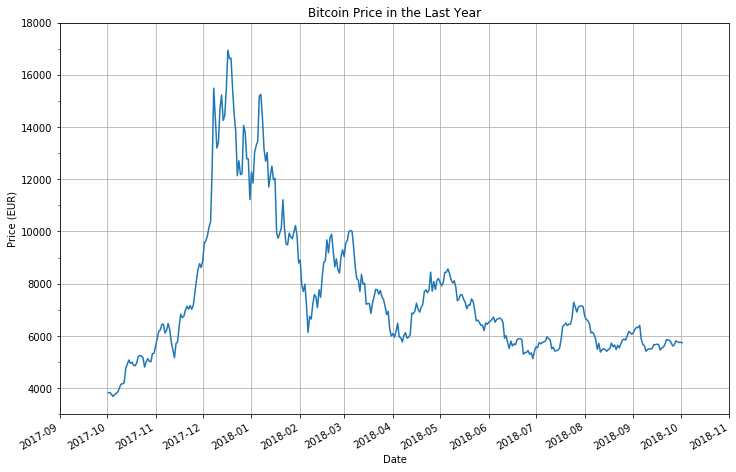

In [92]:
# Set figure size
fig, ax = plt.subplots(figsize=(12,8))

# Plot a line-graph of Bitcoin price in the last year
ax.plot('date', 'price(EUR)', data=dataLY)

# Label axes and add title
ax.set_xlabel('Date')
ax.set_ylabel('Price (EUR)')
ax.set_title('Bitcoin Price in the Last Year')

# Set x axis major ticks every month.
fmt_half_year = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_half_year)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set x axis range
dateMin = dt.date(2017, 9, 1)
dateMax = dt.date(2018, 11, 1)
ax.set_xlim(dateMin, dateMax)

# Set y axis minor ticks every 1000 Euros
minticks = ticker.MultipleLocator(1000)
ax.yaxis.set_minor_locator(minticks)

# Set y axis range
ax.set_ylim(3000, 18000)

# Add gridlines
ax.grid(True)

# Rotate and right aligns the x labels, and move the bottom of the axes up to make room for them
fig.autofmt_xdate()

# Export graph as image file at 100 dpi with tightened padding
fig.savefig('Bitcoin_Price_Last_Year.png', dpi=100, bbox_inches = 'tight', pad_inches = 0.25)

# Show graph
plt.show()